In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, confusion_matrix, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.ndimage import gaussian_filter1d
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

Here is the background information on your task
You are a quantitative researcher working with a commodity trading desk. Alex, a VP on the desk, wants to start trading natural gas storage contracts. However, the available market data must be of higher quality to enable the instrument to be priced accurately. They have sent you an email asking you to help extrapolate the data available from external feeds to provide more granularity, considering seasonal trends in the price as it relates to months in the year. To price the contract, we will need historical data and an estimate of the future gas price at any date.

Commodity storage contracts represent deals between warehouse (storage) owners and participants in the supply chain (refineries, transporters, distributors, etc.). The deal is typically an agreement to store an agreed quantity of any physical commodity (oil, natural gas, agriculture) in a warehouse for a specified amount of time. The key terms of such contracts (e.g., periodic fees for storage, limits on withdrawals/injections of a commodity) are agreed upon inception of the contract between the warehouse owner and the client. The injection date is when the commodity is purchased and stored, and the withdrawal date is when the commodity is withdrawn from storage and sold.

A client could be anyone who would fall within the commodities supply chain, such as producers, refiners, transporters, and distributors. This group would also include firms (commodities trading, hedge funds, etc.) whose primary aim is to take advantage of seasonal or intra-day price differentials in physical commodities. For example, if a firm is looking to buy physical natural gas during summer and sell it in winter, it would take advantage of the seasonal price differential mentioned above. The firm would need to leverage the services of an underground storage facility to store the purchased inventory to realize any profits from this strategy.

Here is your task
After asking around for the source of the existing data, you learn that the current process is to take a monthly snapshot of prices from a market data provider, which represents the market price of natural gas delivered at the end of each calendar month. This data is available for roughly the next 18 months and is combined with historical prices in a time series database. After gaining access, you are able to download the data in a CSV file.

You should use this monthly snapshot to produce a varying picture of the existing price data, as well as an extrapolation for an extra year, in case the client needs an indicative price for a longer-term storage contract.

Download the monthly natural gas price data.
Each point in the data set corresponds to the purchase price of natural gas at the end of a month, from 31st October 2020 to 30th September 2024.
Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future.
Your code should take a date as input and return a price estimate.
Try to visualize the data to find patterns and consider what factors might cause the price of natural gas to vary. This can include looking at months of the year for seasonal trends that affect the prices, but market holidays, weekends, and bank holidays need not be accounted for. Submit your completed code below.



In [2]:
# Analyze the data to estimate the purchase price of gas at any date in the past and extrapolate it for one year into the future.

In [3]:
df_natural_gas = pd.read_csv("./datasets/Nat_Gas.csv")
df_natural_gas

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


In [4]:
df_natural_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dates   48 non-null     object 
 1   Prices  48 non-null     float64
dtypes: float64(1), object(1)
memory usage: 896.0+ bytes


In [5]:
df_natural_gas['Dates'] = pd.to_datetime(df_natural_gas['Dates'])
df_natural_gas

,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


In [6]:
df_natural_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Dates   48 non-null     datetime64[ns]
 1   Prices  48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 896.0 bytes


Text(0, 0.5, 'Prices($)')

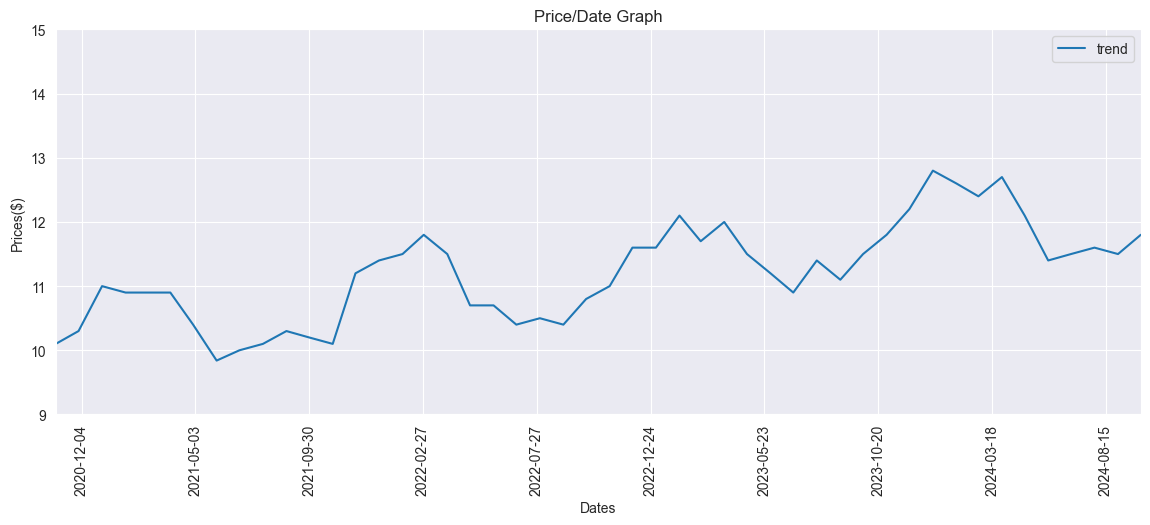

In [7]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=df_natural_gas, x='Dates', y='Prices', label= 'trend')
plt.title("Price/Date Graph")
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12))
plt.tick_params(axis='x', rotation=90)
plt.xlim(pd.to_datetime('2020-10-31'),pd.to_datetime("2024-9-30"))
plt.ylim(9, 15)
plt.ylabel("Prices($)")

In [8]:
df_natural_gas.index = pd.to_datetime(df_natural_gas['Dates'])
df_natural_gas['Year'] = df_natural_gas.index.year
df_natural_gas['Month'] = df_natural_gas.index.month
df_natural_gas['Day'] = df_natural_gas.index.day

df_natural_gas.set_index(['Year', 'Month', 'Day'], inplace=True)

df_natural_gas.sort_index(inplace=True)
df_natural_gas

Dates  Prices
Year Month Day                   
2020 10    31  2020-10-31   10.10
     11    30  2020-11-30   10.30
     12    31  2020-12-31   11.00
2021 1     31  2021-01-31   10.90
     2     28  2021-02-28   10.90
     3     31  2021-03-31   10.90
     4     30  2021-04-30   10.40
     5     31  2021-05-31    9.84
     6     30  2021-06-30   10.00
     7     31  2021-07-31   10.10
     8     31  2021-08-31   10.30
     9     30  2021-09-30   10.20
     10    31  2021-10-31   10.10
     11    30  2021-11-30   11.20
     12    31  2021-12-31   11.40
2022 1     31  2022-01-31   11.50
     2     28  2022-02-28   11.80
     3     31  2022-03-31   11.50
     4     30  2022-04-30   10.70
     5     31  2022-05-31   10.70
     6     30  2022-06-30   10.40
     7     31  2022-07-31   10.50
     8     31  2022-08-31   10.40
     9     30  2022-09-30   10.80
     10    31  2022-10-31   11.00
     11    30  2022-11-30   11.60
     12    31  2022-12-31   11.60
2023 1     31  2023-01-31   12.10
     2     28  2023-02-28   11.70
     3     31  2023-03-31   12.00
     4     30  2023-04-30   11.50
     5     31  2023-05-31   11.20
     6     30  2023-06-30   10.90
     7     31  2023-07-31   11.40
     8     31  2023-08-31   11.10
     9     30  2023-09-30   11.50
     10    31  2023-10-31   11.80
     11    30  2023-11-30   12.20
     12    31  2023-12-31   12.80
2024 1     31  2024-01-31   12.60
     2     29  2024-02-29   12.40
     3     31  2024-03-31   12.70
     4     30  2024-04-30   12.10
     5     31  2024-05-31   11.40
     6     30  2024-06-30   11.50
     7     31  2024-07-31   11.60
     8     31  2024-08-31   11.50
     9     30  2024-09-30   11.80

In [9]:
df_natural_gas_monthly = df_natural_gas.groupby(["Month"])["Prices"].mean()
df_natural_gas_monthly

Month
1     11.775
2     11.700
3     11.775
4     11.175
5     10.785
6     10.700
7     10.900
8     10.825
9     11.075
10    10.750
11    11.325
12    11.700
Name: Prices, dtype: float64

Text(0, 0.5, 'Prices($)')

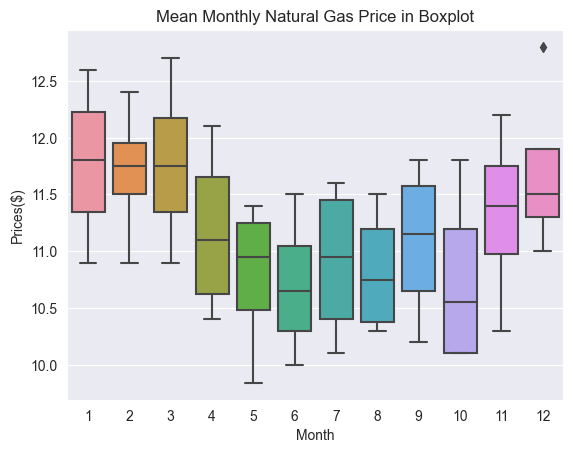

In [10]:
sns.boxplot(data=df_natural_gas, x=df_natural_gas.index.get_level_values(1), y='Prices')
plt.title("Mean Monthly Natural Gas Price in Boxplot")
plt.ylabel("Prices($)")

In [11]:
X_train = df_natural_gas['Dates'].reset_index().copy()
X_train = X_train[['Year', "Month"]]
X_train

,Year,Month
0,2020,10
1,2020,11
2,2020,12
3,2021,1
4,2021,2
5,2021,3
6,2021,4
7,2021,5
8,2021,6
9,2021,7


In [12]:
y_train = df_natural_gas["Prices"].reset_index().copy()
y_train = y_train["Prices"]
y_train

0     10.10
1     10.30
2     11.00
3     10.90
4     10.90
5     10.90
6     10.40
7      9.84
8     10.00
9     10.10
10    10.30
11    10.20
12    10.10
13    11.20
14    11.40
15    11.50
16    11.80
17    11.50
18    10.70
19    10.70
20    10.40
21    10.50
22    10.40
23    10.80
24    11.00
25    11.60
26    11.60
27    12.10
28    11.70
29    12.00
30    11.50
31    11.20
32    10.90
33    11.40
34    11.10
35    11.50
36    11.80
37    12.20
38    12.80
39    12.60
40    12.40
41    12.70
42    12.10
43    11.40
44    11.50
45    11.60
46    11.50
47    11.80
Name: Prices, dtype: float64

In [13]:
X_test = pd.DataFrame(np.array([
    np.concatenate([[2024, 2024, 2024], [2025 for i in range(1, 9+1, 1)]]),
    np.concatenate([[10, 11, 12], [i for i in range(1, 9+1)]])
]).T, columns=['Year', 'Month'])
X_test

,Year,Month
0,2024,10
1,2024,11
2,2024,12
3,2025,1
4,2025,2
5,2025,3
6,2025,4
7,2025,5
8,2025,6
9,2025,7


In [14]:
price_estimation_model = LinearRegression().fit(X_train, y_train)
price_estimation_model

LinearRegression()

In [15]:
y_test = price_estimation_model.predict(X_test)
y_test

array([12.03238127, 12.03584647, 12.03931167, 12.46586288, 12.46932808,
       12.47279328, 12.47625848, 12.47972368, 12.48318888, 12.48665408,
       12.49011928, 12.49358448])

In [16]:
df_natural_gas.index

MultiIndex([(2020, 10, 31),
            (2020, 11, 30),
            (2020, 12, 31),
            (2021,  1, 31),
            (2021,  2, 28),
            (2021,  3, 31),
            (2021,  4, 30),
            (2021,  5, 31),
            (2021,  6, 30),
            (2021,  7, 31),
            (2021,  8, 31),
            (2021,  9, 30),
            (2021, 10, 31),
            (2021, 11, 30),
            (2021, 12, 31),
            (2022,  1, 31),
            (2022,  2, 28),
            (2022,  3, 31),
            (2022,  4, 30),
            (2022,  5, 31),
            (2022,  6, 30),
            (2022,  7, 31),
            (2022,  8, 31),
            (2022,  9, 30),
            (2022, 10, 31),
            (2022, 11, 30),
            (2022, 12, 31),
            (2023,  1, 31),
            (2023,  2, 28),
            (2023,  3, 31),
            (2023,  4, 30),
            (2023,  5, 31),
            (2023,  6, 30),
            (2023,  7, 31),
            (2023,  8, 31),
            (2023,  

C:\Users\mitlonginus\AppData\Local\Temp\ipykernel_18528\3648366801.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data=df_natural_gas, x=df_natural_gas.index.get_level_values(1), y='Prices', ci=0, color='b', label='')


<AxesSubplot:xlabel='Month', ylabel='Prices'>

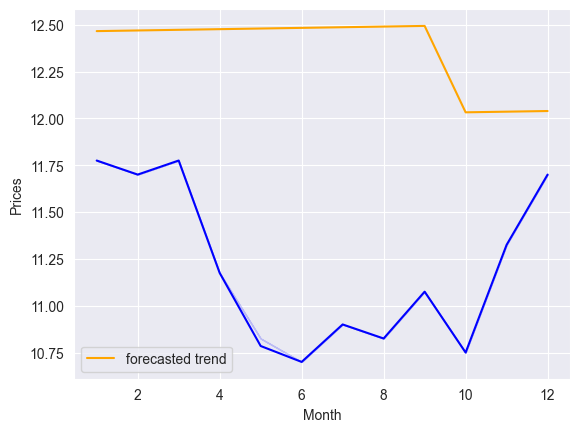

In [17]:
sns.lineplot(data=df_natural_gas, x=df_natural_gas.index.get_level_values(1), y='Prices', ci=0, color='b', label='')
sns.lineplot(x=X_test["Month"], y=y_test, label='forecasted trend', color='orange')


Reason for why this model sucks:

In [18]:
price_estimation_model_rf_regressor = RandomForestRegressor().fit(X_train, y_train)
price_estimation_model_rf_regressor

RandomForestRegressor()

In [19]:
y_pred_rf_regressor = price_estimation_model_rf_regressor.predict(X_test)
y_pred_rf_regressor

array([11.774, 12.1  , 12.51 , 12.531, 12.444, 12.577, 11.984, 11.456,
       11.401, 11.545, 11.507, 11.698])

C:\Users\mitlonginus\AppData\Local\Temp\ipykernel_18528\3260953177.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.lineplot(data=df_natural_gas, x=df_natural_gas.index.get_level_values(1), y='Prices', ci=0, color='b')


<AxesSubplot:xlabel='Month', ylabel='Prices'>

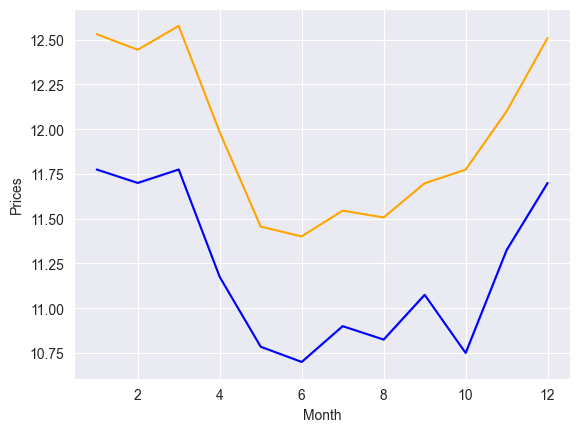

In [20]:
sns.lineplot(data=df_natural_gas, x=df_natural_gas.index.get_level_values(1), y='Prices', ci=0, color='b')
sns.lineplot(x=X_test["Month"], y=y_pred_rf_regressor, color='orange')

In [21]:
X_test

,Year,Month
0,2024,10
1,2024,11
2,2024,12
3,2025,1
4,2025,2
5,2025,3
6,2025,4
7,2025,5
8,2025,6
9,2025,7


In [22]:
df_natural_gas_prediction = pd.DataFrame({
    'Year': X_test['Year'],
    'Month': X_test['Month'],
    'Prices': y_pred_rf_regressor
})
df_natural_gas_prediction['Dates'] = pd.to_datetime(df_natural_gas_prediction[['Year', 'Month']].assign(DAY=1))
df_natural_gas_prediction['Dates'] = df_natural_gas_prediction['Dates'] + pd.offsets.MonthEnd(0)

In [23]:
df_natural_gas_prediction

,Year,Month,Prices,Dates
0,2024,10,11.774,2024-10-31
1,2024,11,12.100,2024-11-30
2,2024,12,12.510,2024-12-31
3,2025,1,12.531,2025-01-31
4,2025,2,12.444,2025-02-28
5,2025,3,12.577,2025-03-31
6,2025,4,11.984,2025-04-30
7,2025,5,11.456,2025-05-31
8,2025,6,11.401,2025-06-30
9,2025,7,11.545,2025-07-31


In [24]:
df_natural_gas_multi_level_indexes = df_natural_gas.copy()
df_natural_gas_multi_level_indexes

Dates  Prices
Year Month Day                   
2020 10    31  2020-10-31   10.10
     11    30  2020-11-30   10.30
     12    31  2020-12-31   11.00
2021 1     31  2021-01-31   10.90
     2     28  2021-02-28   10.90
     3     31  2021-03-31   10.90
     4     30  2021-04-30   10.40
     5     31  2021-05-31    9.84
     6     30  2021-06-30   10.00
     7     31  2021-07-31   10.10
     8     31  2021-08-31   10.30
     9     30  2021-09-30   10.20
     10    31  2021-10-31   10.10
     11    30  2021-11-30   11.20
     12    31  2021-12-31   11.40
2022 1     31  2022-01-31   11.50
     2     28  2022-02-28   11.80
     3     31  2022-03-31   11.50
     4     30  2022-04-30   10.70
     5     31  2022-05-31   10.70
     6     30  2022-06-30   10.40
     7     31  2022-07-31   10.50
     8     31  2022-08-31   10.40
     9     30  2022-09-30   10.80
     10    31  2022-10-31   11.00
     11    30  2022-11-30   11.60
     12    31  2022-12-31   11.60
2023 1     31  2023-01-31   12.10
     2     28  2023-02-28   11.70
     3     31  2023-03-31   12.00
     4     30  2023-04-30   11.50
     5     31  2023-05-31   11.20
     6     30  2023-06-30   10.90
     7     31  2023-07-31   11.40
     8     31  2023-08-31   11.10
     9     30  2023-09-30   11.50
     10    31  2023-10-31   11.80
     11    30  2023-11-30   12.20
     12    31  2023-12-31   12.80
2024 1     31  2024-01-31   12.60
     2     29  2024-02-29   12.40
     3     31  2024-03-31   12.70
     4     30  2024-04-30   12.10
     5     31  2024-05-31   11.40
     6     30  2024-06-30   11.50
     7     31  2024-07-31   11.60
     8     31  2024-08-31   11.50
     9     30  2024-09-30   11.80

In [25]:
df_natural_gas = df_natural_gas.reset_index()
df_natural_gas = df_natural_gas[['Dates', 'Prices']]
df_natural_gas

,Dates,Prices
0,2020-10-31,10.10
1,2020-11-30,10.30
2,2020-12-31,11.00
3,2021-01-31,10.90
4,2021-02-28,10.90
5,2021-03-31,10.90
6,2021-04-30,10.40
7,2021-05-31,9.84
8,2021-06-30,10.00
9,2021-07-31,10.10


In [26]:
df_natural_gas_question_1_ultimate = pd.merge(df_natural_gas, df_natural_gas_prediction[['Dates', 'Prices']], on=['Dates', 'Prices'], how='outer')
df_natural_gas_question_1_ultimate

,Dates,Prices
0,2020-10-31,10.100
1,2020-11-30,10.300
2,2020-12-31,11.000
3,2021-01-31,10.900
4,2021-02-28,10.900
5,2021-03-31,10.900
6,2021-04-30,10.400
7,2021-05-31,9.840
8,2021-06-30,10.000
9,2021-07-31,10.100


<AxesSubplot:xlabel='Dates', ylabel='Prices'>

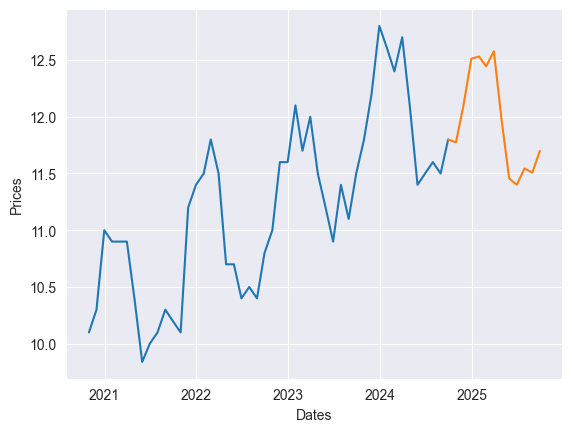

In [30]:
sns.lineplot(data=df_natural_gas_question_1_ultimate.iloc[0:48, :], x='Dates', y='Prices')
sns.lineplot(data=df_natural_gas_question_1_ultimate.iloc[47:, :], x='Dates', y='Prices')